# Lab Work 3: Classification of Image Data

## 1 Load the MNIST Data-Set
* get the data using code below
* assemble information on number of images, size of images, distribution among different classes

In [1]:
from sklearn.datasets import fetch_openml
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, parser='auto')

By using ``info()`` we can get the following information on the data: <br>
- Number of images: 7000
- Size of images: 784 pixels ( most likely 28 x 28 pixels )

In [3]:
X.info()
y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In order to get a more detailed breakdown of the distribution among different classes, y-values (target objects) are plotted using Seaborn's ``displot()``

C:\Users\lpq11\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


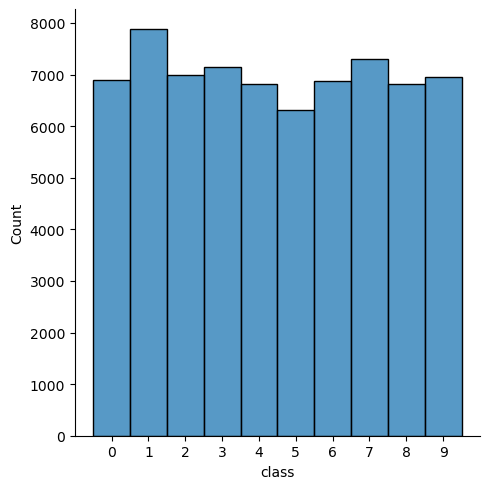

In [4]:
import seaborn as sns
sns.displot(y)

## 2 Visualize the input data
* Display at least two images for each class in the dataset
* Show the class identity per image

#### 1. Create Subplots:
Use ``plt.subplots`` to  draw multiple plots in one figure. <br>
Parameter:
- ``nrows = 10`` represents each digit class (0 to 9), 
- ``ncols = 2`` represents that 2 images will be displayed for each class 
- Set the figure size to (10, 10).

#### 2. Loop Through Each Class (0 to 9):
Use ``np.where`` to get the images belonging to the current class and limit the number of images to display (2)

#### 3. Display Images:
Iterate through each image index in the current class. <br>
Reshape the image data to a 28x28 matrix. <br>
Use ``imshow`` to display the image in the corresponding subplot. <br>
Parameter:
- ``X = digit_img`` - the image data to be plotted,
- ``cmap = 'gray'``- mapping image to gray scale <br>
Turn off axis labels with ``axis('off')`` for cleaner visualization. <br>
Set the title of the subplot to indicate the class.

#### 4. Adjust Layout and Show Plot:
Use ``plt.tight_layout()`` to prevent overlapping of subplots and display the plot using ``plt.show()``

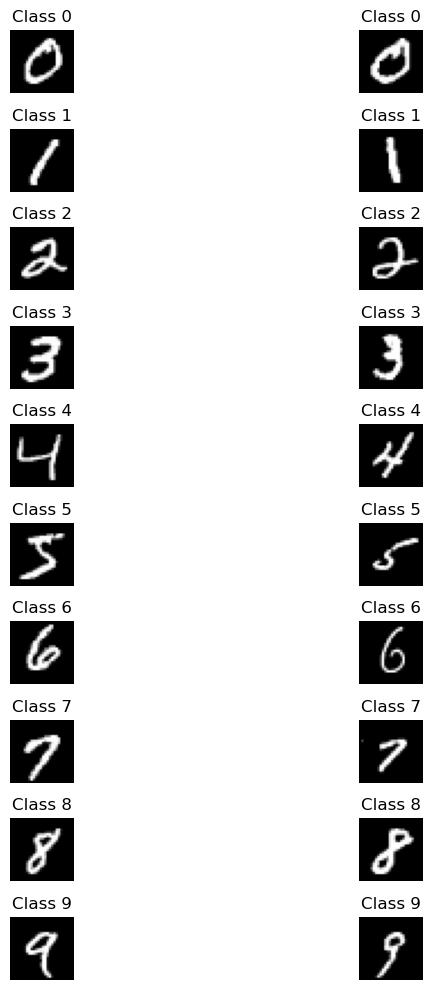

In [5]:
y = y.astype(int)
fig, axes = plt.subplots(10, 2, figsize=(10, 10))

# Loop through each class
for i in range(10):
    class_indices = np.where(y == i)[0][:2]
    
    # Loop through each image in the current class
    for j, idx in enumerate(class_indices):
        digit_img = X.iloc[idx].to_numpy().reshape(28, 28)
        axes[i, j].imshow(digit_img, cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(f"Class {i}")

plt.tight_layout()
plt.show()

## 3 Train a k-NN Classifier and Check the Performance

### 3.1 Import the required modules for classifier and performance measurement

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

### 3.2 Train the classifier using 3-fold cross_validation 
* create a training and testing set
* train the classifer with cross_validate, check the documentation: What does cross_validate return?

#### 1. Create a Training and Testing Set:
Use ``train_test_split`` to split data into Training and Testing Sets. <br>
Parameter:
- X, y is the arrray to be splitted
- ``test_size=0.2``- 20% of the dataset to be used for testing and the rest (80%) for training 
- ``random_state=42`` - simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time. <br>

#### 2. Train the classifier:
Instantiate a KNeighborsClassifier with a specified number of neighbors (``n_neighbors=5``). <br>
Use ``cross_validate`` to perform 3-fold cross validation <br>
Parameter:
- ``estimator = knn_classifier`` - is the classifier to be used,
- ``cv = 3`` - the number of folds for cross-validation (here: 3),
- ``scoring='accuracy'`` - accuracy is used here for the evaluation <br>
cross_validate returns a dictionary containing informations such as **test scores**, **train scores**, **score time** and **fit times**


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# 3-fold cross-validation
cross_val_results = cross_validate(knn_classifier, X_train.values, y_train.values, cv=3, scoring='accuracy')
print("Cross validateion results:", cross_val_results)

Cross validateion results:  {'fit_time': array([0.16375971, 0.13564658, 0.12795281]), 'score_time': array([16.75049853, 16.15395689, 16.71442866]), 'test_score': array([0.96780415, 0.96978625, 0.96774885])}


### 3.3 Use the best classifier from the previuous run and check with your test set 
* Generate a classification report
* Generate a confusion matrix

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Use ``fit()`` to fit teh classifier on the training set <br>
Create predictions on the test set with ``predict()``-method <br>
Generate a classification report using ``classification_report()`` with y_test and the prediction created y_pred as parameters

In [29]:
# classification report
knn_classifier.fit(X_train.values, y_train.value
y_pred = knn_classifier.predict(X_test.values)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

C:\Users\lpq11\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



Generate a confusion matrix using ``confusion_matrix()`` with y_test and the prediction created, y_pred as parameters. <br>
Then use ``sklearn.metrics.ConfusionMatrixDisplay`` for a better confusion matrix visualization.

Confusion Matrix: 


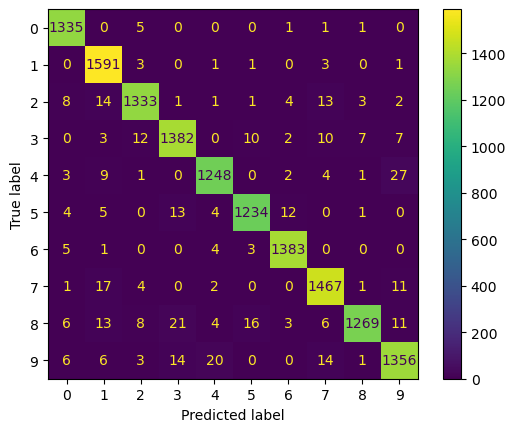

In [23]:
# confusion matrix
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
disp.plot()
plt.show()

# 4 Train a Decision Tree Classifier and Check the Performance

In [24]:
from sklearn.tree import DecisionTreeClassifier

### 4.1 Train the classifier using 3-fold cross_validation

In [25]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
cross_val_results_dt = cross_validate(decision_tree_classifier, X_train.values, y_train.values, cv=3, scoring='accuracy')
print("Cross validation results for Decision Tree Classifier:", cross_val_results_dt)

Cross validateion results for Decision Tree: {'fit_time': array([13.99377322, 13.61287808, 13.44329953]), 'score_time': array([0.03856611, 0.03934669, 0.0370214 ]), 'test_score': array([0.85728826, 0.86360958, 0.85545912])}


### 4.2 Check the performance with your test set

Based on the result we can tell that the Decision Tree Classifier has a lower accuracy compared to other classifier which means that the number of correct prediction is lower.

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.87      0.83      0.85      1380
           3       0.83      0.84      0.83      1433
           4       0.84      0.87      0.85      1295
           5       0.83      0.82      0.82      1273
           6       0.90      0.90      0.90      1396
           7       0.91      0.90      0.91      1503
           8       0.80      0.80      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

Confusion Matrix: 


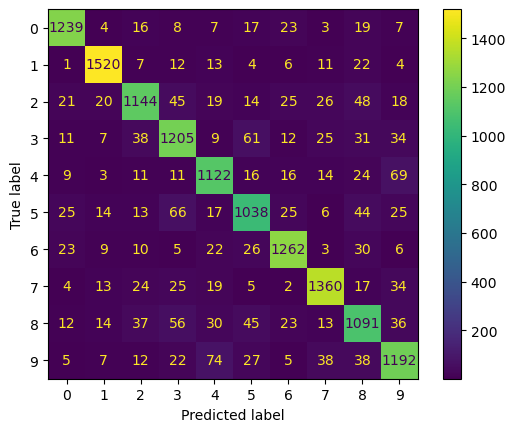

In [32]:
decision_tree_classifier.fit(X_train.values, y_train.values)

# classification report
y_pred = decision_tree_classifier.predict(X_test.values)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

# confusion matrix
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_classifier.classes_)
disp.plot()
plt.show()

## 5 Improve with random forests

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cross_val_results_rf = cross_validate(random_forest_classifier, X_train, y_train, cv=3, scoring='accuracy')
print("Cross validation results for Random Forest Classifier:", cross_val_results_rf)

Cross validation results for Random Forest Classifier: {'fit_time': array([37.33319545, 37.54240942, 38.88182926]), 'score_time': array([0.75501966, 0.75406122, 0.79547167]), 'test_score': array([0.96485777, 0.96833985, 0.96565949])}


Based on the result we can tell that using Random Forest Classifier has improved accuracy of the results.

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix: 


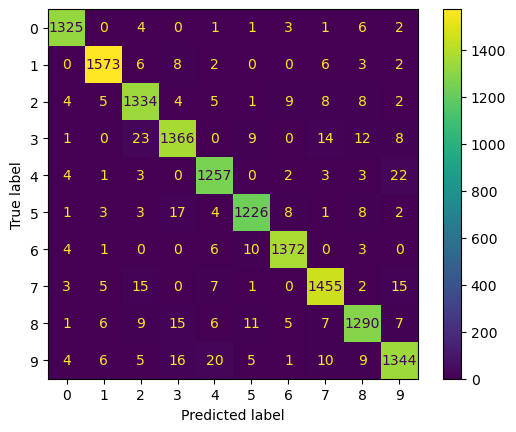

In [41]:
random_forest_classifier.fit(X_train.values, y_train.values)

# classification report
y_pred = random_forest_classifier.predict(X_test.values)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

# confusion matrix
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_classifier.classes_)
disp.plot()
plt.show()

## 6 Further improvement: Gradient Boosting (Random Forests)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
cross_val_results_gb = cross_validate(gradient_boosting_classifier, X_train, y_train, cv=3, scoring='accuracy')
print("Cross validation results for Gradient Boosting Classifier:", cross_val_results_gb)

Cross validation results for Gradient Boosting Classifier: {'fit_time': array([1174.80005836, 1168.47555518, 1044.17579889]), 'score_time': array([0.94600034, 0.83892155, 0.73654127]), 'test_score': array([0.94257245, 0.94348315, 0.9425158 ])}


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1343
           1       0.97      0.98      0.97      1600
           2       0.94      0.94      0.94      1380
           3       0.93      0.92      0.93      1433
           4       0.94      0.95      0.94      1295
           5       0.94      0.93      0.93      1273
           6       0.97      0.96      0.97      1396
           7       0.95      0.94      0.95      1503
           8       0.93      0.92      0.93      1357
           9       0.91      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.94      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Confusion Matrix: 


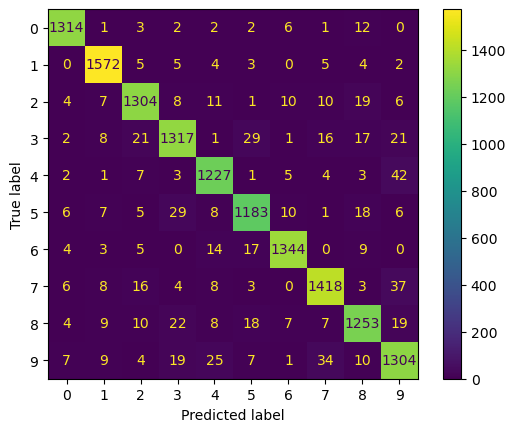

In [44]:
gradient_boosting_classifier.fit(X_train.values, y_train.values)

# classification report
y_pred = gradient_boosting_classifier.predict(X_test.values)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

# confusion matrix
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gradient_boosting_classifier.classes_)
disp.plot()
plt.show()